In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"IPL_22.csv")

In [3]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [5]:
df.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


### Basic Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [8]:
df.shape

(74, 20)

In [9]:
print(f"The CSV has {df.shape[0]} rows and {df.shape[1]} columns")

The CSV has 74 rows and 20 columns


In [13]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

1. Which Team won most matches ?

In [29]:
most_match_winner = df['match_winner'].value_counts()
most_match_winner

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 0, 'Wins')

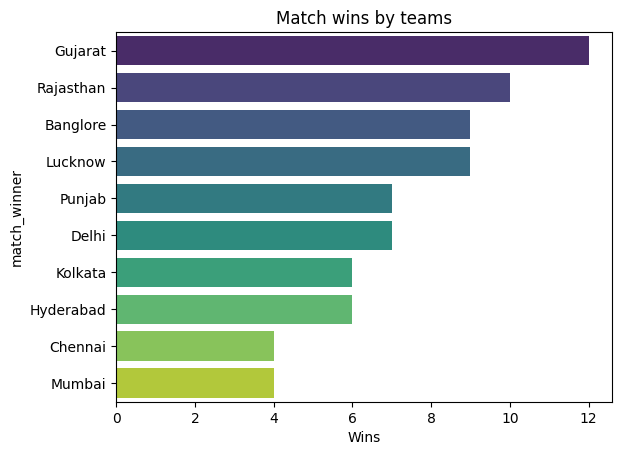

In [30]:
sns.barplot(x= most_match_winner.values, y = most_match_winner.index, palette='viridis')
plt.title('Match wins by teams')
plt.xlabel("Wins")

2. Toss Decison trends

Text(0.5, 1.0, 'Toss Decison trends')

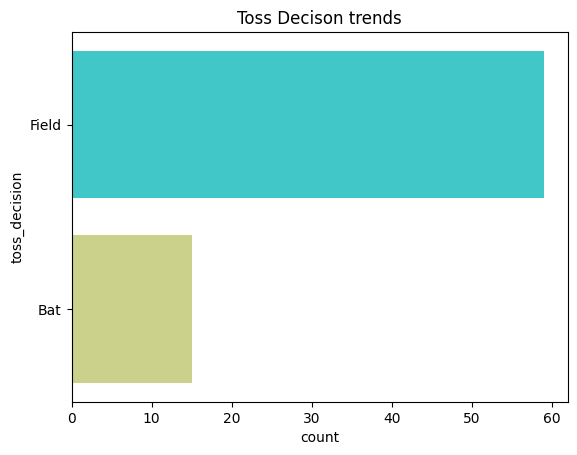

In [33]:
sns.countplot(df['toss_decision'],palette='rainbow')
plt.title("Toss Decison trends")

3. Toss winner vs match winner

In [47]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
per = (count * 100)/df.shape[0]
per.round(4)

np.float64(48.6486)

<Axes: xlabel='toss_winner', ylabel='match_winner'>

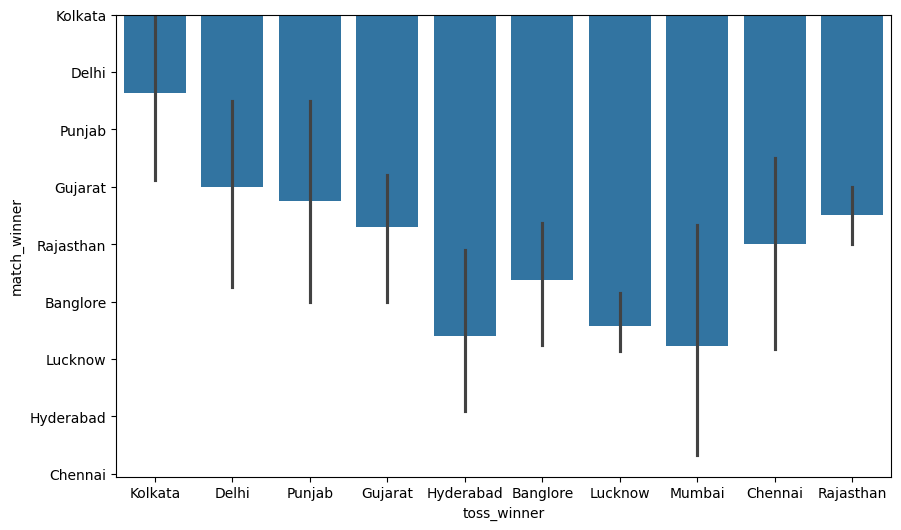

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='toss_winner', y='match_winner', data = df)

4. How do teams win ? ( by run or by wickets)

<Axes: xlabel='won_by', ylabel='count'>

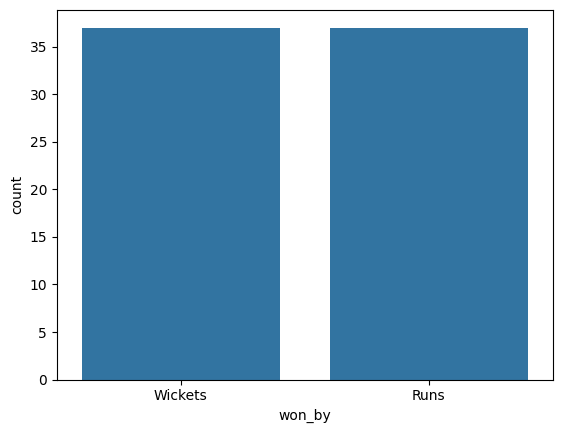

In [64]:
sns.countplot(x = df['won_by'])

### Key Player Performance 

1. Most 'Player of the match' awards

In [69]:
count = df['player_of_the_match'].value_counts()
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
K L Rahul            2
Yuzvendra Chahal     2
David Miller         2
Jasprit Bumrah       2
Umran Malik          2
Evin Lewis           1
Abhishek Sharma      1
Pat Cummins          1
Liam Livingstone     1
Lockie Ferguson      1
Shivam Dube          1
Sanju Samson         1
Odean Smith          1
Mohammed Shami       1
Mayank Agarwal       1
Anuj Rawat           1
Kane Williamson      1
Faf du Plessis       1
Rashid Khan          1
Marco Jansen         1
Shikhar Dhawan       1
Mukesh Choudhary     1
Krunal Pandya        1
Rahul Tewatia        1
Suruakumar Yadav     1
Mohsin Khan          1
Ruturaj Gaikwad      1
Rinku Singh          1
Kagiso Rabada        1
Riyan Parag          1
Harshal Patel        1
David Warner         1
Yashasvi Jaisw

Text(0.5, 1.0, "Most 'Player of the match' awards")

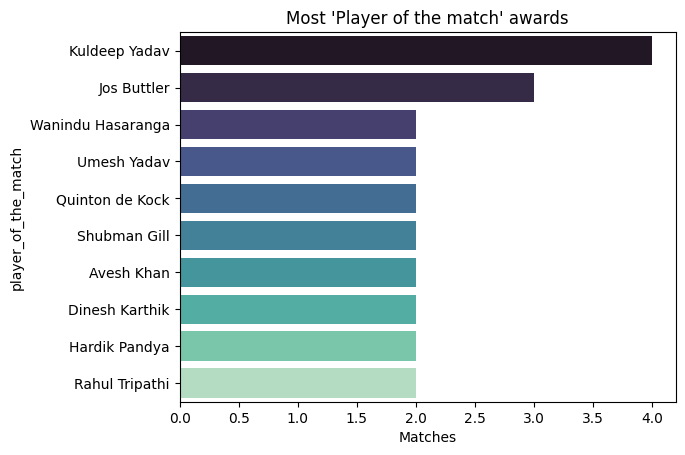

In [80]:
sns.barplot(x = count.head(10).values, y = count.head(10).index, palette='mako')
plt.xlabel('Matches')
plt.title("Most 'Player of the match' awards")

2. Top Scorer 

In [83]:
top_scorer = df['top_scorer'].value_counts()
top_scorer

top_scorer
Jos Buttler            7
Quinton de Kock        5
Liam Livingstone       4
Shubman Gill           4
KL Rahul               4
Ishan Kishan           3
David Warner           3
W. Saha                3
Faf du Plessis         3
Shikhar Dhawan         2
Deepak Hooda           2
MS Dhoni               2
Abhishek Sharma        2
Devon Conway           2
Hardik Pandya          2
Rahul Tripathi         2
Mitchell Marsh         2
Andre Russell          2
Virat Kohli            2
Aiden Markram          1
Pat Cummins            1
Kane Williamson        1
Shivam Dube            1
Suryakumar Yadav       1
Shimron Hetmyer        1
Sherfane Rutherford    1
David Miller           1
Tilak Varma            1
Dinesh Karthik         1
Nitish Rana            1
Riyan Parag            1
Sanju Samson           1
Ruturaj Gaikwad        1
Sai Sudharsan          1
Yashasvi Jaiswal       1
Moeen Ali              1
Rajat Patidar          1
Name: count, dtype: int64

In [99]:
score = int(df[df['top_scorer'] == top_scorer.index[0]]['highscore'].sum())
print(f"Score of {top_scorer.index[0]} is {score}")

Score of Jos Buttler is 651


In [103]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(5)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
KL Rahul           351
Shubman Gill       288
Faf du Plessis     257
Name: highscore, dtype: int64

Text(0.5, 1.0, 'Top Scorer')

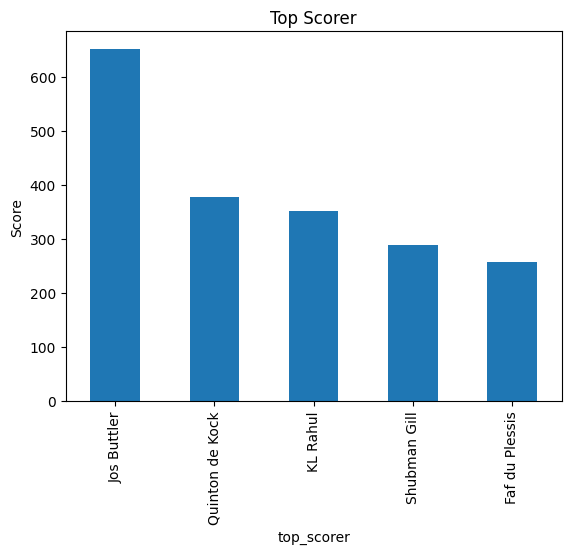

In [111]:
high.plot(kind = "bar")
plt.ylabel("Score")
plt.title("Top Scorer")

3. Best Bowling Figures

In [126]:
df['Highest_Wickets'] = df['best_bowling_figure'].apply(lambda x : x.split("--")[0])
df['Highest_Wickets'] = df['Highest_Wickets'].astype(int)

bowl_fig = df.groupby('best_bowling')['Highest_Wickets'].sum().sort_values(ascending=False).head(10)
bowl_fig

best_bowling
Yuzvendra Chahal     17
Jasprit Bumrah       11
Kuldeep Yadav        11
Rashid Khan          11
Josh Hazlewood       10
Kagiso Rabada        10
Avesh Khan           10
Umran Malik           9
Wanindu Hasaranga     9
T Natarajan           8
Name: Highest_Wickets, dtype: int64

Text(0.5, 1.0, 'Best Bowling Figures')

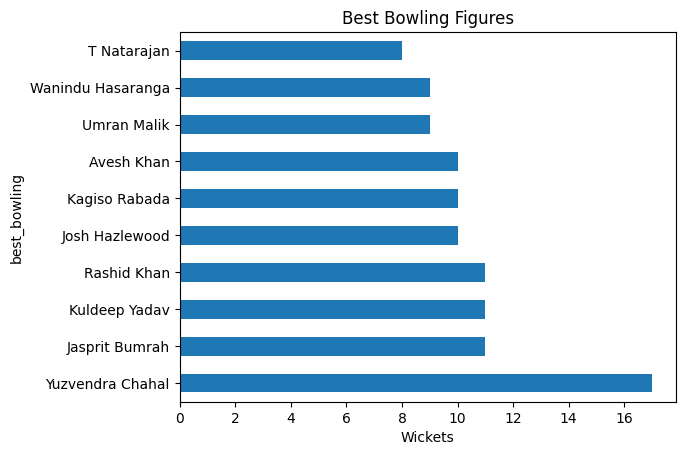

In [133]:
bowl_fig.plot(kind = 'barh')
plt.xlabel("Wickets")
plt.title("Best Bowling Figures")

### Venue Analysis 

1. Most matches Played on

In [137]:
most_venue = df['venue'].value_counts()
most_venue

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

Text(0.5, 1.0, 'Venue vs Matches Played')

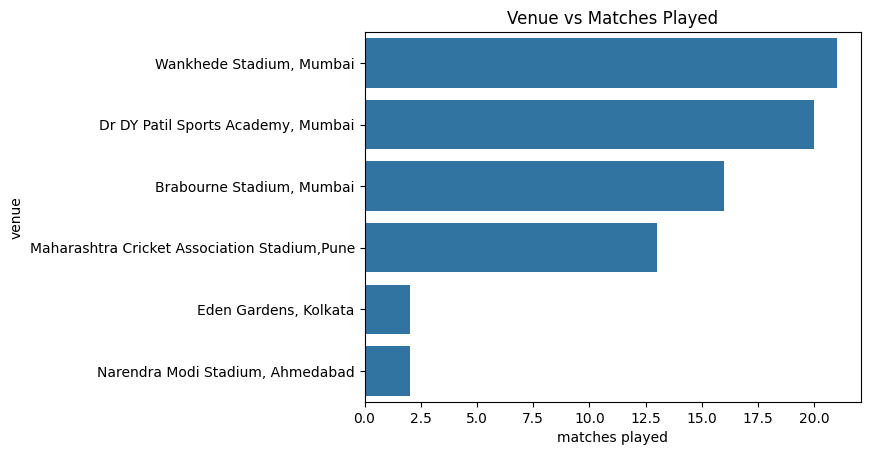

In [141]:
sns.barplot(x = most_venue.values, y = most_venue.index)
plt.xlabel("matches played")
plt.title("Venue vs Matches Played")

### More analysis

1. Who won by highest margin ( runs )

In [156]:
high_margin = df[df['won_by'] == 'Runs'].sort_values(by = 'margin', ascending = False)
high_margin.head(1)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,Highest Wickets,Highest_Wickets
54,55,"May 8,2022","Dr DY Patil Sports Academy, Mumbai",Chennai,Delhi,Group,Delhi,Field,208,6,...,Chennai,Runs,91,Devon Conway,Devon Conway,87,Moeen Ali,3--13,None,3


2. Which Player had highest individual score

In [168]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']].reset_index(drop=True)

,top_scorer,highscore
0,Quinton de Kock,140


3. Which bowler had best bowling figure

In [172]:
df[df['Highest_Wickets'] == df['Highest_Wickets'].max()][['best_bowling','best_bowling_figure']].head(1)

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40


### Done